In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [131]:
df = pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [71]:
linreg1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
linr

LinregressResult(slope=np.float64(0.06304458401213482), intercept=np.float64(-119.06594196773983), rvalue=np.float64(0.984757131182585), pvalue=np.float64(3.788696979113155e-102), stderr=np.float64(0.0009692118713287152), intercept_stderr=np.float64(1.886943381242523))

In [124]:
extended_yrs = np.arange(df['Year'].min(), 2051)
extended_yrs

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 20

In [144]:
# Create first line of best fit
func1 = linreg1.slope * extended_yrs + linreg1.intercept
ax.plot(extended_yrs, func1, 'green')
plt.show()

In [113]:
above_2000 = df[df['Year'] >= 2000]
above_2000

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [140]:
linreg2 = linregress(df[df['Year'] >= 2000]['Year'], df[df['Year'] >= 2000]['CSIRO Adjusted Sea Level'])
linreg2

LinregressResult(slope=np.float64(0.1664272733318682), intercept=np.float64(-325.7934668059649), rvalue=np.float64(0.9762875716140618), pvalue=np.float64(2.4388064141618245e-09), stderr=np.float64(0.010652933111541163), intercept_stderr=np.float64(21.375153425608215))

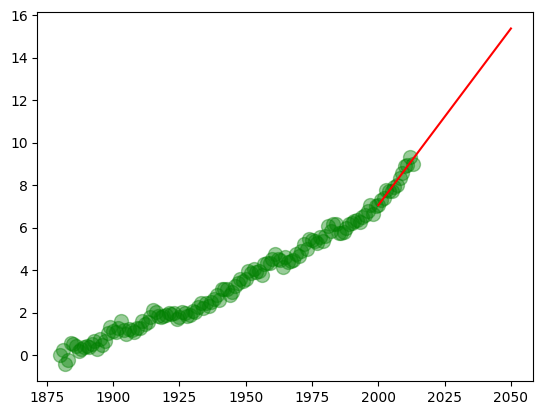

In [160]:
fig, ax = plt.subplots()

func2 = linreg2.slope * np.arange(df[df['Year'] >= 2000]['Year'].min(), 2051) + linreg2.intercept
ax.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'],s=100, alpha=0.4, color='green', marker='o')
ax.plot(np.arange(df[df['Year'] >= 2000]['Year'].min(), 2051), func2, 'red')
plt.show()

In [153]:
df.Year.min()

np.int64(1880)

Text(0, 0.5, 'Sea Level (inches)')

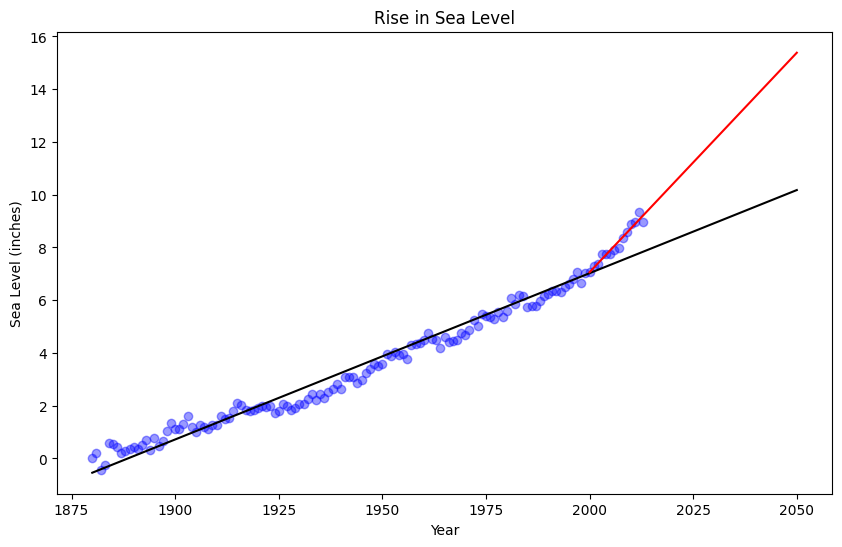

In [166]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'], alpha=0.4, color='blue', marker='o')

# Create first line of best fit
lr1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
extended_yrs = np.arange(df['Year'].min(), 2051)
func1 = lr1.slope * extended_yrs + lr1.intercept
ax.plot(extended_yrs, func1, 'black')

# Create second line of best fit
lr2 = linregress(df[df['Year'] >= 2000]['Year'], df[df['Year'] >= 2000]['CSIRO Adjusted Sea Level'])
ext = np.arange(df[df['Year'] >= 2000]['Year'].min(), 2051)
func2 = lr2.slope * ext + lr2.intercept
ax.plot(ext, func2, 'r')

# Add labels and title
ax.set_title('Rise in Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')